# Integral equation for un-averaging bootstrap current

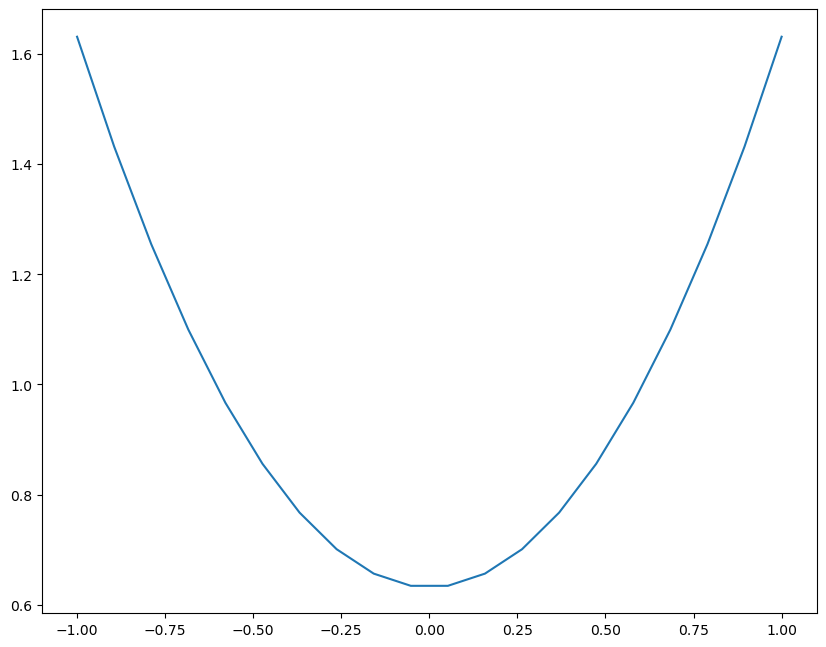

In [14]:
x, dx = np.linspace(-1, 1, 20, retstep=True)
weights = 1 + x **2
weights -= weights.mean() - 1
plt.plot(x, weights)

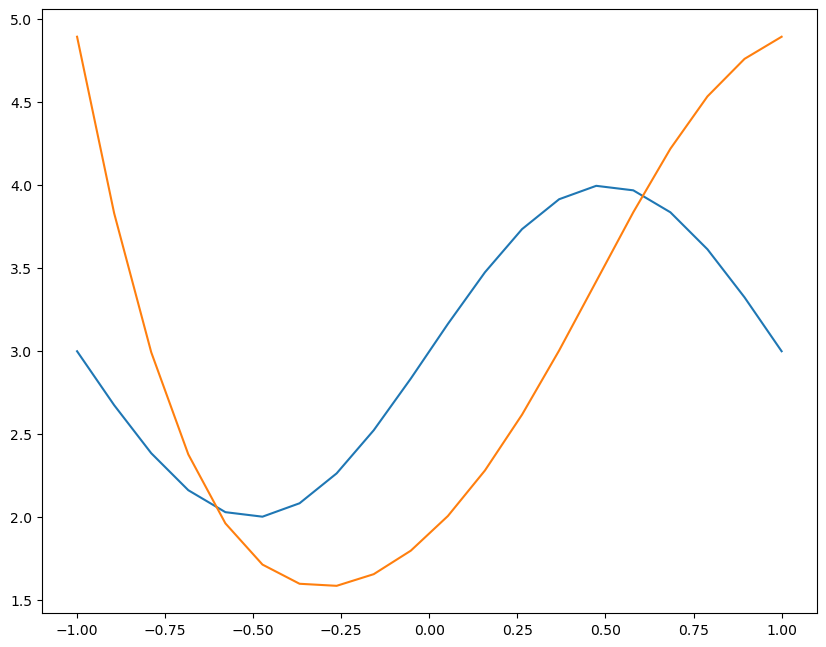

In [15]:
y = np.sin(np.pi * x) + 3
plt.plot(x, y)
plt.plot(x, y * weights)

In [16]:
from scipy import integrate

In [17]:
integral = integrate.simpson(y * weights, x)

5.7900568596005275

In [18]:
y * weights * dx

array([0.51523546, 0.4033038 , 0.3151368 , 0.25037029, 0.20664217,
       0.18050893, 0.16834255, 0.16703947, 0.1744279 , 0.18933018,
       0.21131132, 0.24020981, 0.27559065, 0.3162762 , 0.36009465,
       0.40394247, 0.4441916 , 0.47739856, 0.50120123, 0.51523546])

In [23]:
from scipy import optimize

In [34]:
estimated_value = integral / integrate.simpson(weights, x)

3.0000000000000004

In [24]:
def fun(yp):
    trial_integral = integrate.simpson(yp * weights, x)
    costfunction = (trial_integral - integral)**2
    return costfunction

In [41]:
boundval = np.full_like(weights, estimated_value)
bounds = optimize.Bounds(boundval - 3, boundval + 3)

Bounds(array([4.4408921e-16, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16,
       4.4408921e-16, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16,
       4.4408921e-16, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16,
       4.4408921e-16, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16,
       4.4408921e-16, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16]), array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6.]))

In [42]:
optimizer2 = optimize.differential_evolution(fun, bounds)

KeyboardInterrupt: 

In [43]:
optimizer = optimize.minimize(fun, x0=y)

      fun: 0.0
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [

In [44]:
ytrial = optimizer.x

array([3.        , 2.67530053, 2.38578729, 2.16283352, 2.03059973,
       2.00341551, 2.08422667, 2.26427609, 2.52405261, 2.83540541,
       3.16459459, 3.47594739, 3.73572391, 3.91577333, 3.99658449,
       3.96940027, 3.83716648, 3.61421271, 3.32469947, 3.        ])

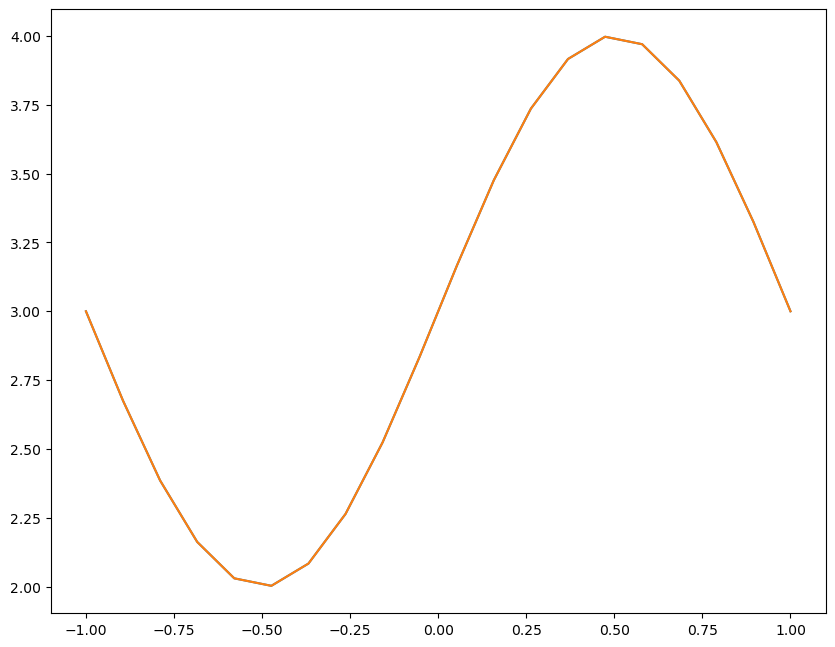

In [45]:
plt.plot(x, y)
plt.plot(x, ytrial)